<a href="https://colab.research.google.com/github/ReedJA117/XGBoost_MachineLearning/blob/main/XGB_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import random
import collections
import timeit
import xgboost as xgb
import sklearn.metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
train = pd.read_csv('final_train_df.csv')
test = pd.read_csv('final_test_df.csv')

In [ ]:
zeroList = [0]*986
test['views'] = zeroList
test['views'].value_counts()


0    986
Name: views, dtype: int64

In [ ]:
y_train = train['views']
y_test = test['views']
X_train = train.loc[:, train.columns != 'comp_id']
X_test = test.loc[:, test.columns != 'comp_id']





In [ ]:
X_train = train.drop(['comp_id','views'], axis = 1).to_numpy()
X_test = test.drop(['comp_id','views'], axis = 1).to_numpy()
y_train = train.loc[:, 'views'].to_numpy()
y_test = test.loc[:, 'views'].to_numpy()


print('Training set shape ', X_train.shape)
print('Test set shape ', X_test.shape)

Training set shape  (3000, 1388)
Test set shape  (986, 1388)


In [ ]:
trlabel = y_train
telabel = y_test

dtrain = xgb.DMatrix(X_train, label=trlabel)
dtest  = xgb.DMatrix(X_test, label=telabel)

In [ ]:
# Set parameters.
param = {'max_depth': 7, 
         'eta': 0.2,
         'objective': 'reg:squarederror',
         'nthread': 5,
         'eval_metric': 'rmse'
        }

evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [ ]:
# Train the model.
num_round = 70
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-rmse:196.538	train-rmse:1197.78
[1]	eval-rmse:309.153	train-rmse:1090.79
[2]	eval-rmse:391.747	train-rmse:1012.55
[3]	eval-rmse:494.503	train-rmse:947.393
[4]	eval-rmse:549.435	train-rmse:883.429
[5]	eval-rmse:596.604	train-rmse:833.542
[6]	eval-rmse:632.813	train-rmse:793.177
[7]	eval-rmse:670.612	train-rmse:770.022
[8]	eval-rmse:691.822	train-rmse:736.16
[9]	eval-rmse:707.046	train-rmse:707.687
[10]	eval-rmse:724.68	train-rmse:677.365
[11]	eval-rmse:730.167	train-rmse:630.967
[12]	eval-rmse:736.328	train-rmse:616.112
[13]	eval-rmse:753.435	train-rmse:593.508
[14]	eval-rmse:761.686	train-rmse:562.538
[15]	eval-rmse:768.46	train-rmse:551.306
[16]	eval-rmse:778.819	train-rmse:519.913
[17]	eval-rmse:787.371	train-rmse:502.169
[18]	eval-rmse:792.425	train-rmse:477.75
[19]	eval-rmse:802.646	train-rmse:462.117
[20]	eval-rmse:816.393	train-rmse:446.694
[21]	eval-rmse:817.15	train-rmse:410.518
[22]	eval-rmse:819.603	train-rmse:387.858
[23]	eval-rmse:827.098	train-rmse:375.96
[24]	eva

In [ ]:
# Make prediction.
ypred = bst.predict(dtrain).round()
print(ypred)

[ 274. 1304.  287. ...  165.  150.   35.]


In [ ]:
import csv
with open('XGB_train_pre.csv','w',newline='') as f:
  writer = csv.writer(f)
  writer.writerows(map(lambda x: [x], ypred))

In [ ]:
# Make prediction.
ypred = bst.predict(dtest).round()

# Compute RMSE on test set.
mse_xgboost = mean_squared_error(y_test, ypred)
rmse_xgboost = math.sqrt(mse_xgboost)

print('RMSE with XGBoost', rmse_xgboost)
#xgboost.get_params()
#print(ypred)

RMSE with XGBoost 899.1403805497177


In [ ]:
with open('XGB_test_pre.csv','w',newline='') as f:
  writer = csv.writer(f)
  writer.writerows(map(lambda x: [x], ypred))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
allPlt = pd.read_csv('all_preditions.csv')
xRange = []
xRange.append(0)
for x in range(99,3000,100):
  xRange.append(x)
x = allPlt.loc[:, 'comp_id']
y_ActualViews = allPlt.loc[:, 'Actual_views']
y_XGBoost =  allPlt.loc[:, 'Just_XGBoost']
y_Hybrid =  allPlt.loc[xRange, 'CNN_XGBoost']
y_CNN =  allPlt.loc[xRange, 'Just_CNN']

In [ ]:
#print(x)

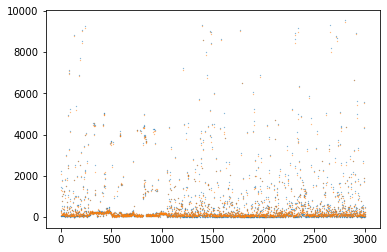

In [ ]:
plt.scatter(x,y_ActualViews,s=.05)
plt.scatter(x,y_XGBoost,s=.05)


In [ ]:
plt.show()